Online Convolutional Dictionary Learning
========================================

This example demonstrates the use of [dictlrn.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.dictlrn.cbpdndl.html#sporco.dictlrn.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of training images. The dictionary is learned using the online dictionary learning algorithm proposed in [[21]](http://sporco.rtfd.org/en/latest/zreferences.html#liu-2018-first).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import onlinecdl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.stack((S1, S2, S3, S4, S5), axis=3)

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 3, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = onlinecdl.OnlineConvBPDNDictLearn.Options({
    'Verbose': True, 'MaxMainIter': 50, 'AccurateDFid' : True,
    'CBPDN': {'rho': 3.0, 'AutoRho': {'Enabled': False},
              'RelaxParam': 1.0, 'RelStopTol': 1e-7, 'MaxMainIter': 50,
              'FastSolve': False, 'DataType': np.float32},
    'OCDL': {'ZeroMean': False, 'eta_a': 10.0, 'eta_b': 20.0,
             'DataType': np.float32}})

Create solver object and solve.

In [6]:
d = onlinecdl.OnlineConvBPDNDictLearn(D0, sh[..., [0]], lmbda, opt)

for it in range(opt['MaxMainIter']):
    img_index = np.random.randint(0, sh.shape[-1])
    d.solve(sh[..., [img_index]])

d.display_end()
D1 = d.getdict()
print("OnlineConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Cnstr     ρ         η       
----------------------------------------------------------------


   0  2.80e+02  1.35e+02  7.22e+02  8.05e+01  3.00e+00  5.00e-01


   1  2.22e+02  1.06e+02  5.80e+02  7.39e+01  3.00e+00  4.76e-01


   2  7.37e+01  3.07e+01  2.15e+02  2.47e+01  3.00e+00  4.55e-01


   3  1.72e+02  5.75e+01  5.74e+02  5.00e+01  3.00e+00  4.35e-01


   4  6.34e+01  2.32e+01  2.01e+02  2.10e+01  3.00e+00  4.17e-01


   5  1.47e+02  5.81e+01  4.42e+02  3.61e+01  3.00e+00  4.00e-01


   6  1.41e+02  3.72e+01  5.17e+02  3.68e+01  3.00e+00  3.85e-01


   7  1.69e+02  5.47e+01  5.74e+02  4.33e+01  3.00e+00  3.70e-01


   8  1.42e+02  5.47e+01  4.34e+02  3.27e+01  3.00e+00  3.57e-01


   9  1.32e+02  3.37e+01  4.93e+02  3.33e+01  3.00e+00  3.45e-01


  10  6.23e+01  2.17e+01  2.03e+02  1.65e+01  3.00e+00  3.33e-01


  11  1.27e+02  3.40e+01  4.67e+02  3.11e+01  3.00e+00  3.23e-01


  12  1.31e+02  4.35e+01  4.37e+02  2.60e+01  3.00e+00  3.12e-01


  13  6.00e+01  2.14e+01  1.93e+02  1.46e+01  3.00e+00  3.03e-01


  14  1.70e+02  5.81e+01  5.58e+02  3.55e+01  3.00e+00  2.94e-01


  15  5.86e+01  2.09e+01  1.88e+02  1.41e+01  3.00e+00  2.86e-01


  16  1.24e+02  4.06e+01  4.16e+02  2.24e+01  3.00e+00  2.78e-01


  17  1.32e+02  3.63e+01  4.77e+02  2.72e+01  3.00e+00  2.70e-01


  18  5.84e+01  2.11e+01  1.87e+02  1.32e+01  3.00e+00  2.63e-01


  19  1.64e+02  5.35e+01  5.53e+02  3.07e+01  3.00e+00  2.56e-01


  20  1.23e+02  4.03e+01  4.12e+02  2.05e+01  3.00e+00  2.50e-01


  21  1.41e+02  5.42e+01  4.35e+02  2.19e+01  3.00e+00  2.44e-01


  22  1.26e+02  3.26e+01  4.69e+02  2.40e+01  3.00e+00  2.38e-01


  23  1.62e+02  5.33e+01  5.45e+02  2.84e+01  3.00e+00  2.33e-01


  24  1.21e+02  3.87e+01  4.09e+02  1.88e+01  3.00e+00  2.27e-01


  25  1.39e+02  5.31e+01  4.31e+02  2.04e+01  3.00e+00  2.22e-01


  26  1.59e+02  5.14e+01  5.39e+02  2.65e+01  3.00e+00  2.17e-01


  27  1.55e+02  4.88e+01  5.30e+02  2.57e+01  3.00e+00  2.13e-01


  28  1.52e+02  4.77e+01  5.23e+02  2.55e+01  3.00e+00  2.08e-01


  29  1.21e+02  3.89e+01  4.12e+02  1.67e+01  3.00e+00  2.04e-01


  30  1.52e+02  4.83e+01  5.19e+02  2.51e+01  3.00e+00  2.00e-01


  31  1.41e+02  5.47e+01  4.32e+02  1.79e+01  3.00e+00  1.96e-01


  32  1.36e+02  5.22e+01  4.21e+02  1.82e+01  3.00e+00  1.92e-01


  33  1.20e+02  3.78e+01  4.09e+02  1.56e+01  3.00e+00  1.89e-01


  34  1.54e+02  4.95e+01  5.24e+02  2.35e+01  3.00e+00  1.85e-01


  35  1.18e+02  3.79e+01  4.00e+02  1.52e+01  3.00e+00  1.82e-01


  36  1.52e+02  4.82e+01  5.21e+02  2.25e+01  3.00e+00  1.79e-01


  37  1.17e+02  3.75e+01  3.95e+02  1.48e+01  3.00e+00  1.75e-01


  38  1.39e+02  5.40e+01  4.26e+02  1.62e+01  3.00e+00  1.72e-01


  39  1.53e+02  4.87e+01  5.22e+02  2.16e+01  3.00e+00  1.69e-01


  40  1.34e+02  3.42e+01  4.98e+02  1.65e+01  3.00e+00  1.67e-01


  41  1.25e+02  3.25e+01  4.65e+02  1.64e+01  3.00e+00  1.64e-01


  42  1.22e+02  3.20e+01  4.49e+02  1.64e+01  3.00e+00  1.61e-01


  43  1.19e+02  3.19e+01  4.37e+02  1.66e+01  3.00e+00  1.59e-01


  44  1.40e+02  5.38e+01  4.32e+02  1.42e+01  3.00e+00  1.56e-01


  45  1.20e+02  3.85e+01  4.09e+02  1.28e+01  3.00e+00  1.54e-01


  46  1.19e+02  3.20e+01  4.35e+02  1.65e+01  3.00e+00  1.52e-01


  47  1.60e+02  5.22e+01  5.37e+02  1.90e+01  3.00e+00  1.49e-01


  48  1.18e+02  3.12e+01  4.33e+02  1.60e+01  3.00e+00  1.47e-01


  49  1.20e+02  3.86e+01  4.05e+02  1.20e+01  3.00e+00  1.45e-01
----------------------------------------------------------------
OnlineConvBPDNDictLearn solve time: 365.28s


Display initial and final dictionaries.

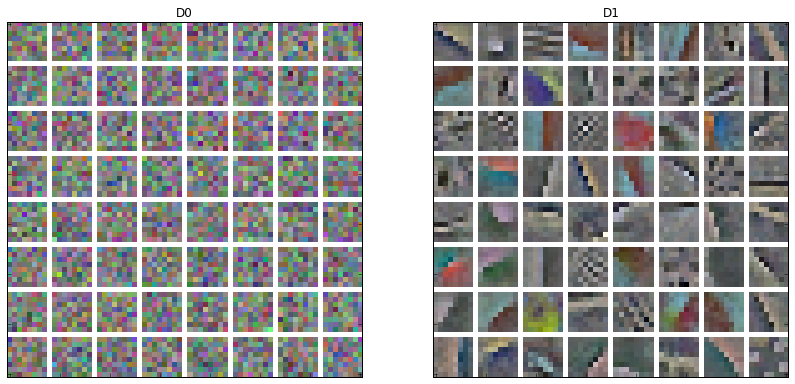

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value.

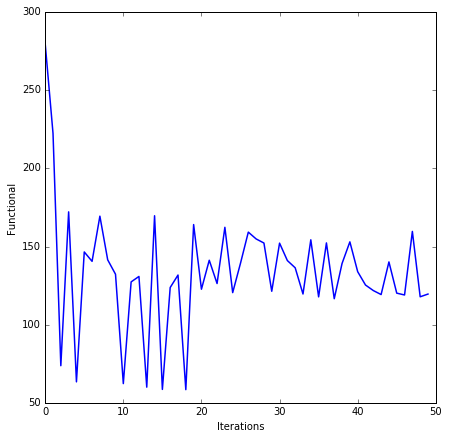

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(7, 7))
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
fig.show()